# Udacity Data Analyst Nanodegree

## Excercises for the Alpha, Beta, Delta, Gamma dataset

Udacity Data Analyst Lesson 3: Univariate Exploration of Data somehow does not provide the dataset on which all the excercises are based. 

In this notebook I recreated a dataset similar to the one used by the Udacity instructor and performed the exercises from this lesson with this dataset. Unfortunately, Udacity did not provide the original dataset in the lesson resources.

### Bar Charts

A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

In [33]:
import pandas as pd
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb
import random

In [14]:
categories = []
for entry in range(200):
  categories.append(random.choice(['Alpha','Beta','Delta','Gamma']))
df = pd.DataFrame({'cat_var': pd.Series(categories)})
df.head()

,cat_var
0,Alpha
1,Alpha
2,Delta
3,Alpha
4,Gamma


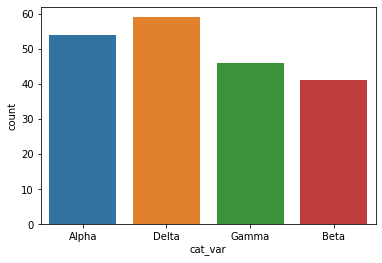

In [16]:
sb.countplot(data = df, x = 'cat_var');

`color_palette` returns a list of RGB tuples. Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. Calling this function without any parameters returns the current / default palette, and we take the first color to be the color for all bars.

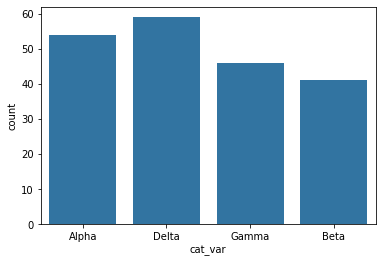

In [17]:
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color);

One thing that we might want to do with a bar chart is to sort the data in some way. For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter

In [18]:
cat_order = df['cat_var'].value_counts().index
cat_order

Index(['Delta', 'Alpha', 'Gamma', 'Beta'], dtype='object')

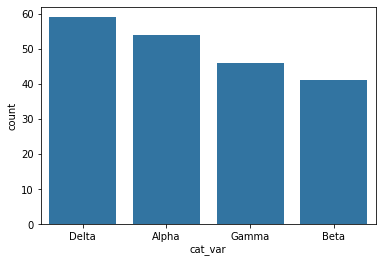

In [19]:
sb.countplot(data = df, x = 'cat_var', color = base_color, order = cat_order);

For ordinal-type data, we probably want to sort the bars in order of the variables. While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. The best thing for us to do in this case is to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.

In [21]:
# this method requires pandas v0.21 or later
level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
level_order

['Alpha', 'Beta', 'Gamma', 'Delta']

In [22]:
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
ordered_cat

CategoricalDtype(categories=['Alpha', 'Beta', 'Gamma', 'Delta'], ordered=True)

In [23]:
df['cat_var'] = df['cat_var'].astype(ordered_cat)

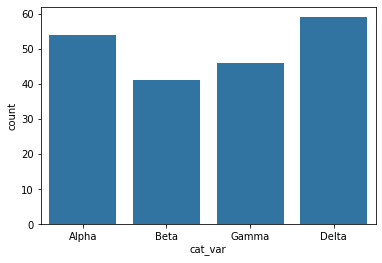

In [24]:
sb.countplot(data = df, x = 'cat_var', color = base_color);

If you have a lot of category levels, or the category names are long, then you might end up with overcrowding of the tick labels. One way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter "y":

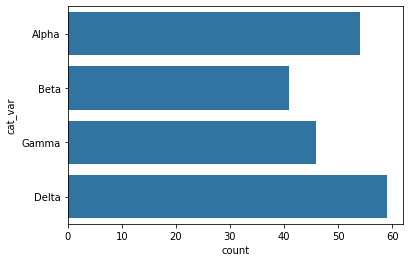

In [26]:
sb.countplot(data = df, y = 'cat_var', color = base_color);

Alternatively, you can use matplotlib's `xticks` function and its "rotation" parameter to change the orientation in which the labels will be depicted (as degrees counter-clockwise from horizontal):

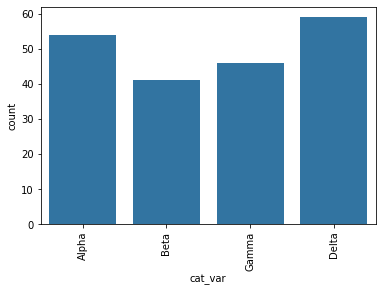

In [28]:
sb.countplot(data = df, x = 'cat_var', color = base_color)
plt.xticks(rotation = 90);

### Absolute vs. Relative Frequency

By default, seaborn's `countplot` function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the counts axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

In [29]:
# get proportion taken by most common group for derivation of tick marks
n_points = df.shape[0]
n_points

200

In [30]:
max_count = df['cat_var'].value_counts().max()
max_count

59

In [31]:
max_prop = max_count / n_points
max_prop

0.295

In [34]:
# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_props

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25])

In [35]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.05', '0.10', '0.15', '0.20', '0.25']

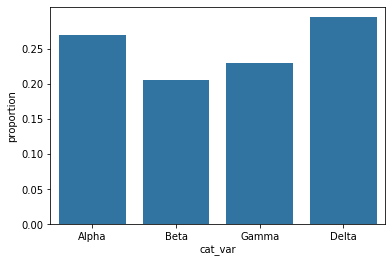

In [36]:
sb.countplot(data = df, x = 'cat_var', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');

### Additional Variation
Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

In [53]:
cat_counts = df['cat_var'].value_counts()
cat_counts

Delta    59
Alpha    54
Gamma    46
Beta     41
Name: cat_var, dtype: int64

locs: [0 1 2 3], labels: <a list of 4 Text xticklabel objects>


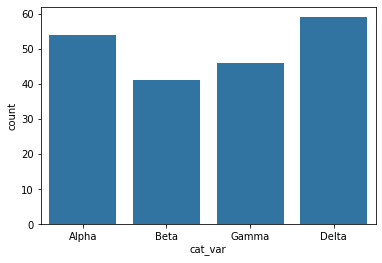

In [54]:
# get the current tick locations and labels
sb.countplot(data = df, x = 'cat_var', color = base_color)
locs, labels = plt.xticks()
print('locs: {}, labels: {}'.format(locs, labels))

count: 54
pct_string: 27.0%
count: 41
pct_string: 20.5%
count: 46
pct_string: 23.0%
count: 59
pct_string: 29.5%


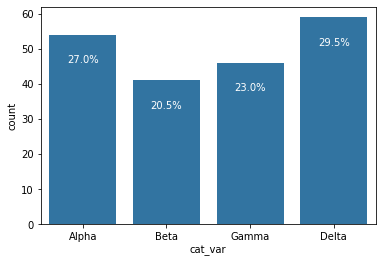

In [55]:
sb.countplot(data = df, x = 'cat_var', color = base_color)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    #get the text properety for the label to get the correct count
    count = cat_counts[label.get_text()]
    print('count: {}'.format(count))
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    print('pct_string: {}'.format(pct_string))
    #print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')

The instructor used the `.get_text()` method to obtain the category name, so he can get the count of each category level. At the end, the instructor used the text function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.


### Counting Missing Data
One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column.

In [62]:
details = { 
    'vars' : ['var_a', 'var_b', 'var_c', 'var_d', 'var_e'], 
    'count' : [55, 21, 0, 45, 6]
} 
df_null = pd.DataFrame(details)
df_null

,vars,count
0,var_a,55
1,var_b,21
2,var_c,0
3,var_d,45
4,var_e,6


Seaborn's `barplot` function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here.

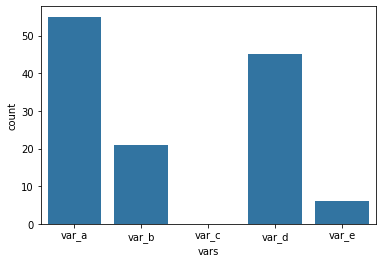

In [77]:
sb.barplot(df_null['vars'], df_null['count'], color = base_color);

The first argument to the function contains the x-values (column names), the second argument the y-values (our counts).

As a general note, this is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. If your data is not yet summarized, however, just use the `countplot` function so that you don't need to do extra summarization work.